### Setup

In [1]:
# Based on Matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Import Data

In [2]:
#importing builtin datasets of seaborn

#checking the names of builtin datasets
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [5]:
# Load a built in dataset based on US State car crash percentages
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### Distribution Plot

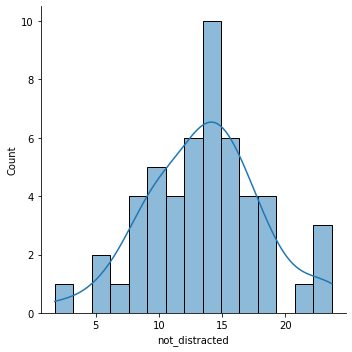

In [23]:
# Provides a way to look at a univariate distribution. A 
# univeriate distribution provides a distribution for one variable
# Kernal Density Estimation with a Histogram is provided
# kde=False removes the KDE

sns.displot(crash_df['not_distracted'], bins=15, kde=True)

# Bins define how many buckets to divide the data up into between intervals
# For example put all profits between $10 and $20 in this bucket

### Joint Plot

to compare two distribution, plots a scatter plot by default

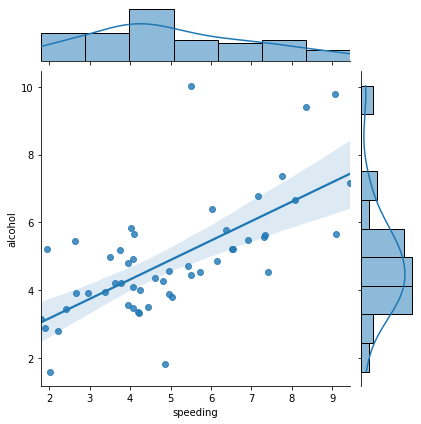

In [19]:
# Jointplot compares 2 distributions and plots a scatter plot by default
# As we can see as people tend to speed they also tend to drink & drive
# With kind you can create a regression line with kind='reg'
# You can create a 2D KDE with kind='kde'
sns.jointplot(x='speeding', y='alcohol', data = crash_df, kind = 'reg')

### KDE Plot

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

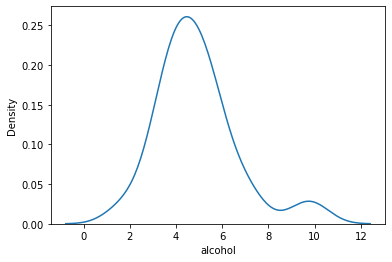

In [20]:
# density: ~~ probability for continous space.
#A random variable x has a probability distribution p(x). The relationship between the outcomes of a
# random variable and its probability is referred to as the probability density, or simply the “density.”

# Probability density function: which represent the distribution of continuous variables, are called probability density
# functions (PDF) or just density functions

# Kernel density estimation: estimates the probability density function.
# or simply for basic understanding,
# Kernal Density Estimation estimates the distribution of data.

#crashes because of alcohol usage
sns.kdeplot(crash_df['alcohol'])

#This plot is involved very often

### Pair Plot

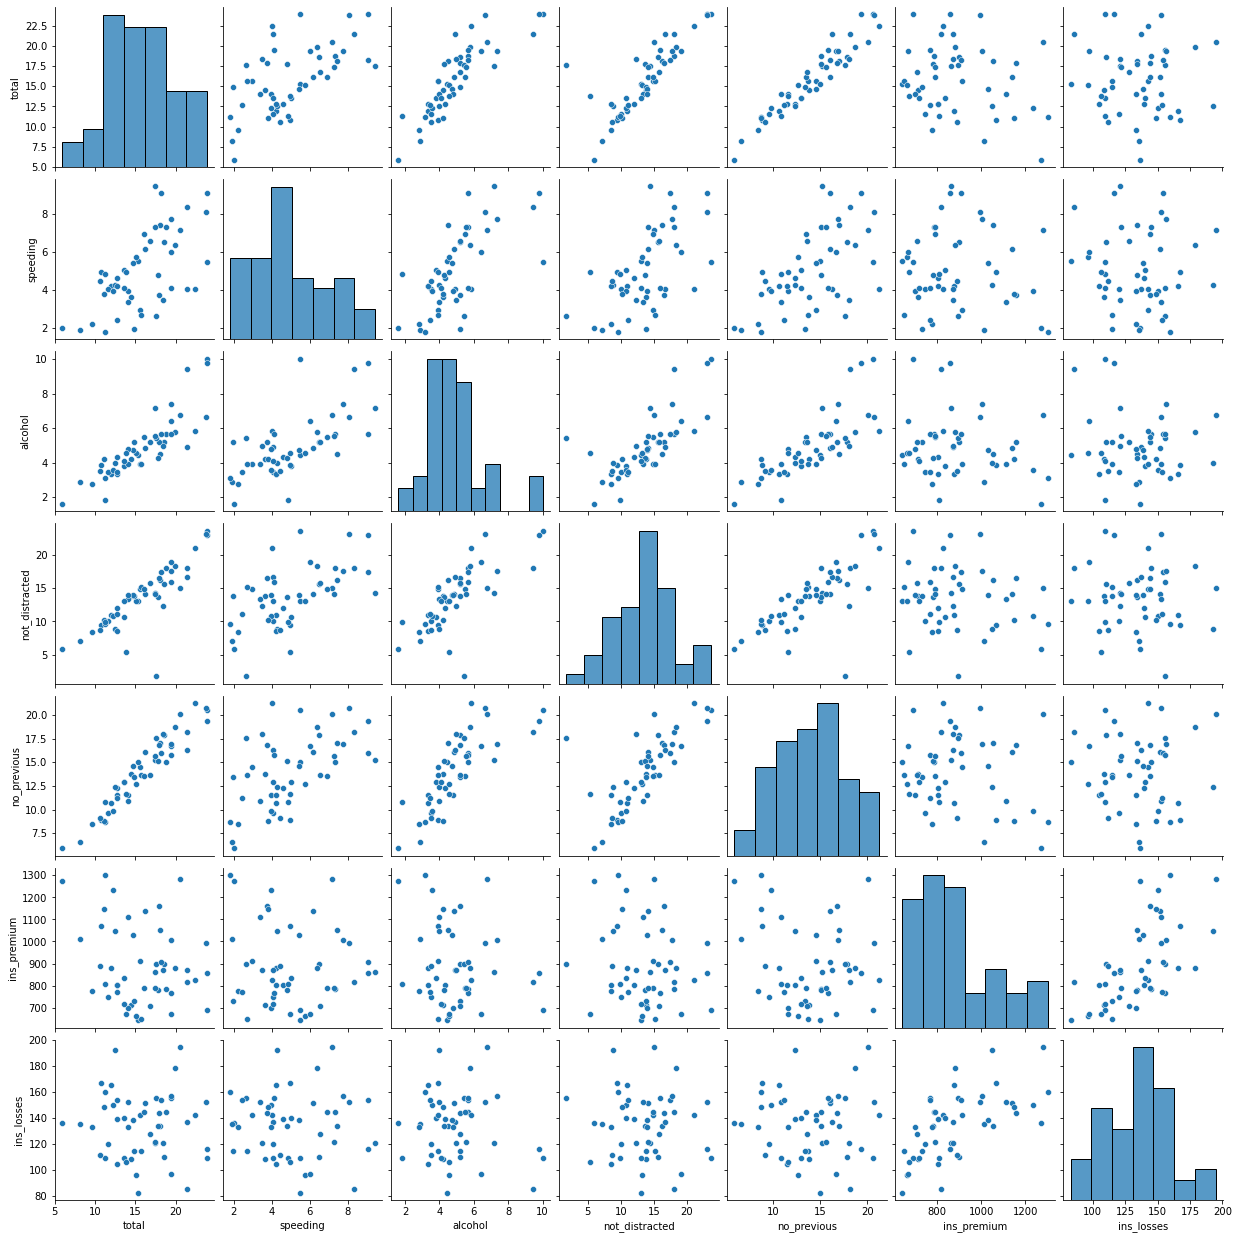

In [25]:
# plot relationship across the data frame's numerical values

sns.pairplot(crash_df)

# see, tons of information

In [29]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


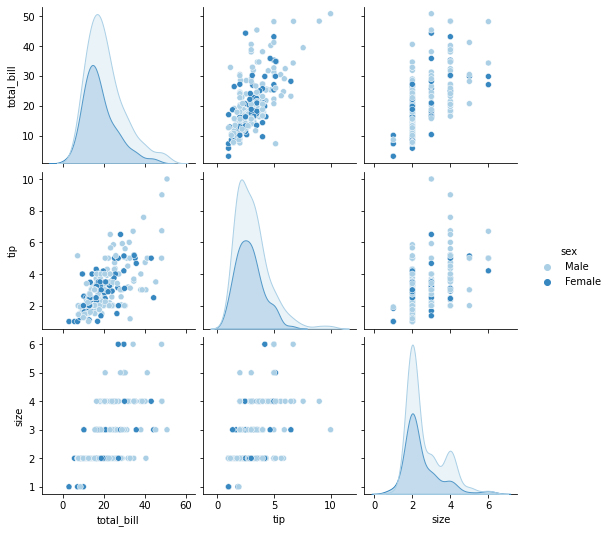

In [30]:
sns.pairplot(tips_df, hue='sex', palette='Blues')

# With hue you can pass in a categorical column and the charts will be colorized
# You can use color maps from Matplotlib to define what colors to use

### Rug Plot

<AxesSubplot:xlabel='total_bill'>

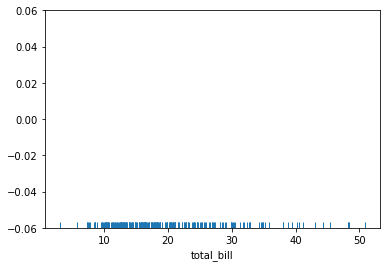

In [33]:
# Plots a single column of datapoints in an array as sticks on an axis
# With a rug plot you'll see a more dense number of lines where the amount is 
# most common. This is like how a histogram is taller where values are more common

sns.rugplot(tips_df['total_bill'])

### Styling

<Figure size 576x288 with 0 Axes>

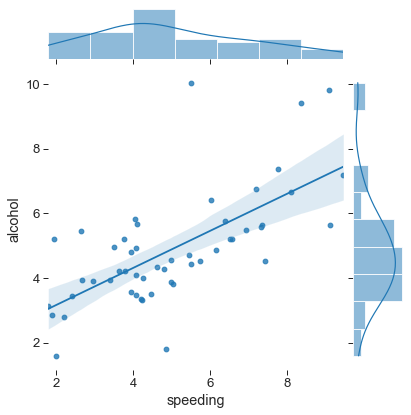

In [64]:
# You can set styling for your axes and grids
# white, darkgrid, whitegrid, dark, ticks
sns.set_style('ticks')

# You can use figure sizing from Matplotlib
plt.figure(figsize=(8,4))

# Change size of lables, lines and other elements to best fit
# how you will present your data (paper, talk, poster)
sns.set_context('paper', font_scale = 1.5)

sns.jointplot(x='speeding', y='alcohol', data = crash_df, kind = "reg")


#  Get rid of spines (lines on left and bottom of the chart)
# You can turn of specific spines with right=True, left=True
# bottom=True, top=True

sns.despine(left=True,  bottom=True)

## Categorical Plots

### Bar Plots

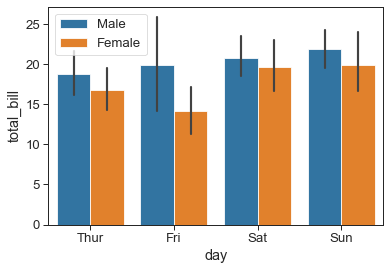

In [94]:
# Focus on distributions using categorical data in reference to one of the numerical
# columns

# Aggregate categorical data based on a function (mean is the default)
# Estimate total bill amount based on sex
# With estimator you can define functions to use other than the mean like those
# provided by NumPy : median, std, var, cov or make your own functions

sns.barplot(x='day', y='total_bill', data=tips_df, hue='sex')
plt.legend(loc='best')

### Cat Plot

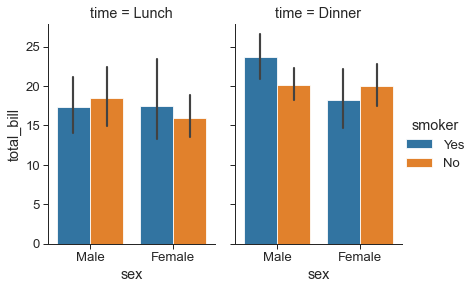

In [101]:
# his allows grouping within additional categorical variables. Using catplot() is safer than using FacetGrid directly,
# as it ensures synchronization of variable order across facets.

sns.catplot(x="sex", y="total_bill", hue="smoker", col="time", data=tips_df, kind="bar", height=4, aspect=.7);

### Count Plot


<AxesSubplot:xlabel='time', ylabel='count'>

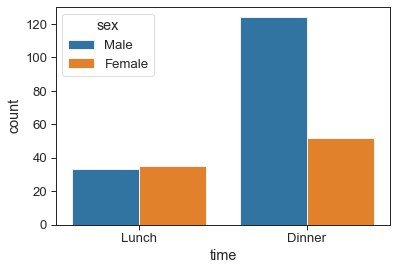

In [106]:
# A count plot is like a bar plot, but the estimator is counting 
# the number of occurances, and with the hue we can be more specific
sns.countplot(x='time', data=tips_df)

### Box and Whisker Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

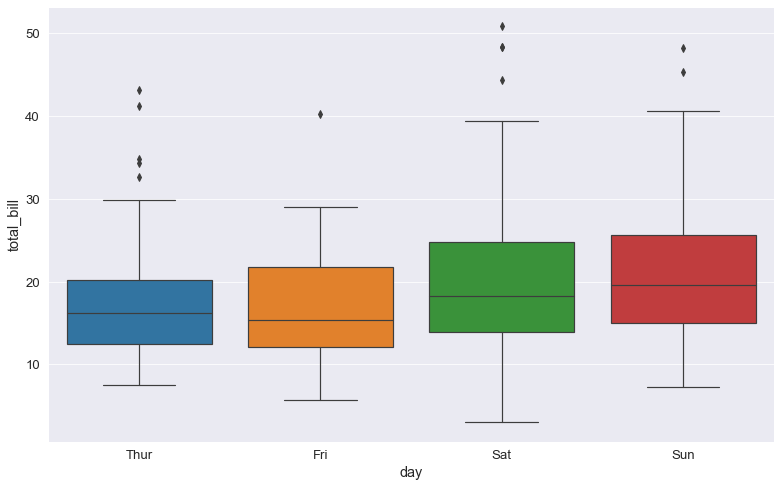

In [134]:
plt.figure(figsize=(13,8))
sns.set_style('darkgrid')
# A box plot allows you to compare different variables
# The box shows the quartiles of the data. The bar in the middle is the median and
# Quartile: each of four equal groups into which a population can be divided according to the distribution of values of a particular variable.
# to identify the quartiles:
# Q1 = tips_df[tips_df['day']=='Thur']['total_bill'].quantile(0.25)
# Q3 = tips_df[tips_df['day']=='Thur']['total_bill'].quantile(0.75)
# outlier_threshold = (Q3-Q1)*1.5 + Q3     #it is higher outlier: lowe outlier= (Q3-Q1)*1.5 - Q1 and Q3-Q1 is called IQR
# round(outlier_threshold, 2) =~ 31.72,
# Any total bill value greater than 31.72 U.S. dollars on Thursday is considered an outlier.
# the box extends 1 standard deviation from the median
# The whiskers extend to all the other data aside from the points that are considered
# to be outliers
# Hue can add another category being sex


sns.boxplot(x='day', y='total_bill', data=tips_df)

### Violin Plot



<AxesSubplot:xlabel='day', ylabel='total_bill'>

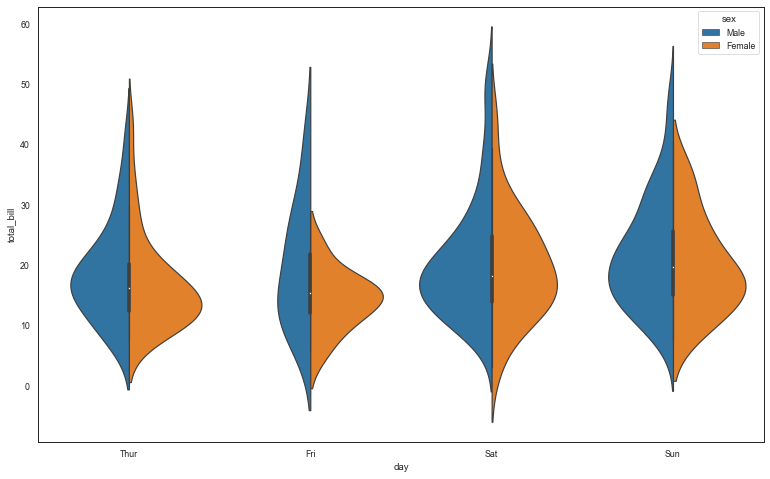

In [224]:
# Violin Plot is a combination of the boxplot and KDE
# While a box plot corresponds to data points, the violin plot uses the KDE estimation
# of the data points

plt.figure(figsize=(13,8))
sns.violinplot(x='day', y = 'total_bill', data =tips_df, hue='sex', split=True)
# with the split, you can combine the gender

### Strip Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

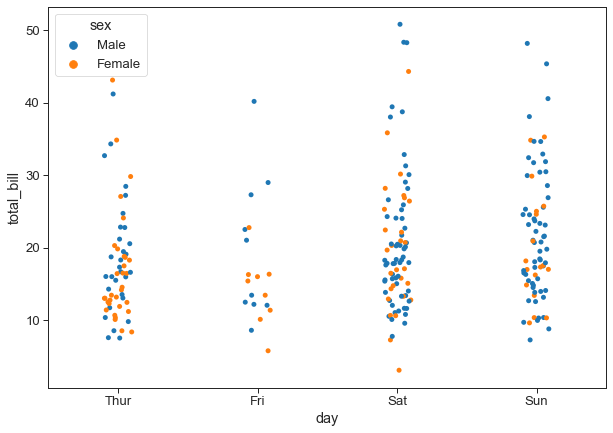

In [154]:
# The strip plot draws a scatter plot representing all data points where one
# variable is categorical. It is often used to show all observations with 
# a box plot that represents the average distribution
# Jitter spreads data points out so that they aren't stacked on top of each other
# Hue breaks data into men and women
# Dodge separates the men and women data

sns.set_style('ticks')
plt.figure(figsize=(10,7))

sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex')

### Swarm Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

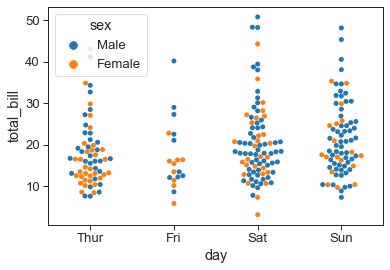

In [169]:
# A swarm plot is like a strip plot, but points are adjusted so they don't overlap
# It looks like a combination of the violin and strip plots

# You can stack a violin plot with a swarm
# sns.violinplot(x='day', y='total_bill', data=tips_df)
sns.swarmplot(x='day', y='total_bill', data=tips_df, hue='sex')

### Palettes

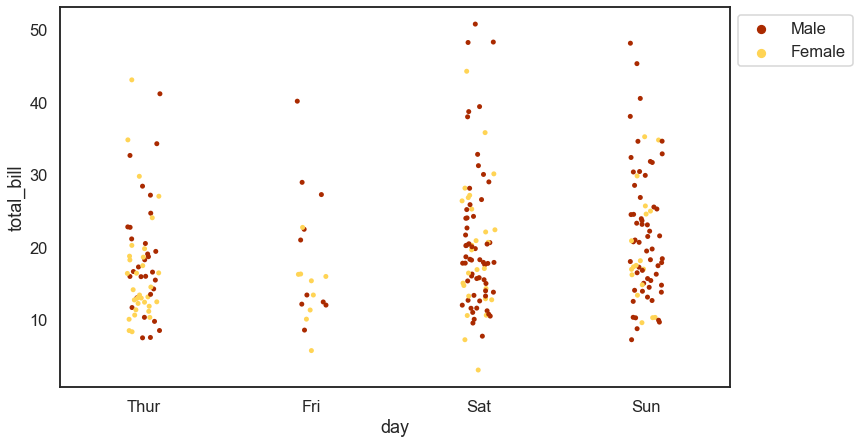

In [189]:
plt.figure(figsize=(12,7))
sns.set_style('white')
sns.set_context('talk')

# You can use Matplotlibs color maps for color styling
# https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='afmhot')

# Add the optional legend with a location number (best: 0, 
# upper right: 1, upper left: 2, lower left: 3, lower right: 4,
# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.legend.html)
# or supply a tuple of x & y from lower left
#bbox_to_anchor=(x,y) to the xy axis
plt.legend(bbox_to_anchor=(1,1))

### Heatmaps

<AxesSubplot:>

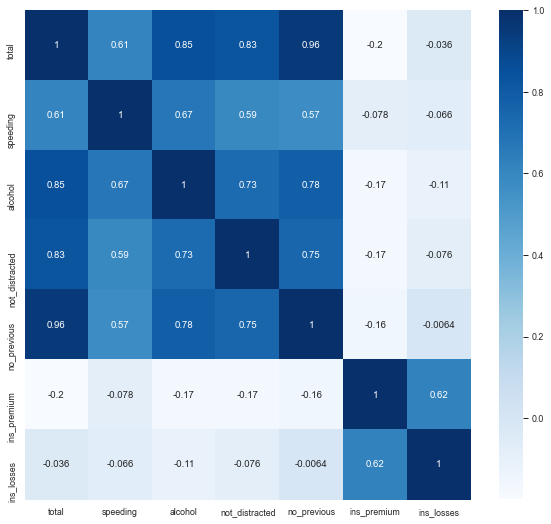

In [197]:
plt.figure(figsize=(10,9))

sns.set_context('paper')

# To create a heatmap with data you must have data set up as a matrix where variables
# are on the columns and rows

# Correlation tells you how influential a variable is on the result
# So we see that n previous accident is heavily correlated with accidents, while the
# insurance premium is not
# 0.7 and 0.9: high correlation
# 0.3 to 0.5: low correlation

crash_mx = crash_df.corr()

sns.heatmap(crash_mx, annot=True, cmap='Blues')



<AxesSubplot:xlabel='year', ylabel='month'>

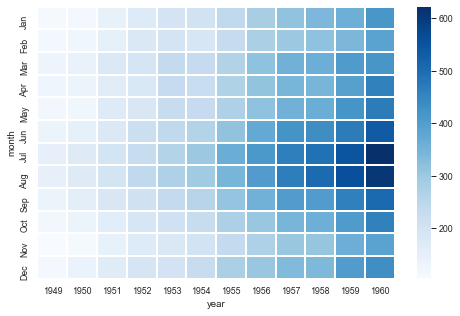

In [212]:
#2nd way to build heatmap


plt.figure(figsize=(8,5))

flights = sns.load_dataset('flights')
# flights.head()
# We can create a matrix with an index of month, columns representing years
# and the number of passengers for each

flights_pt = flights.pivot_table(index='month', columns='year', values='passengers')
flights_pt
sns.heatmap(flights_pt, cmap='Blues', linecolor='white', linewidth=1)

### Cluster Map

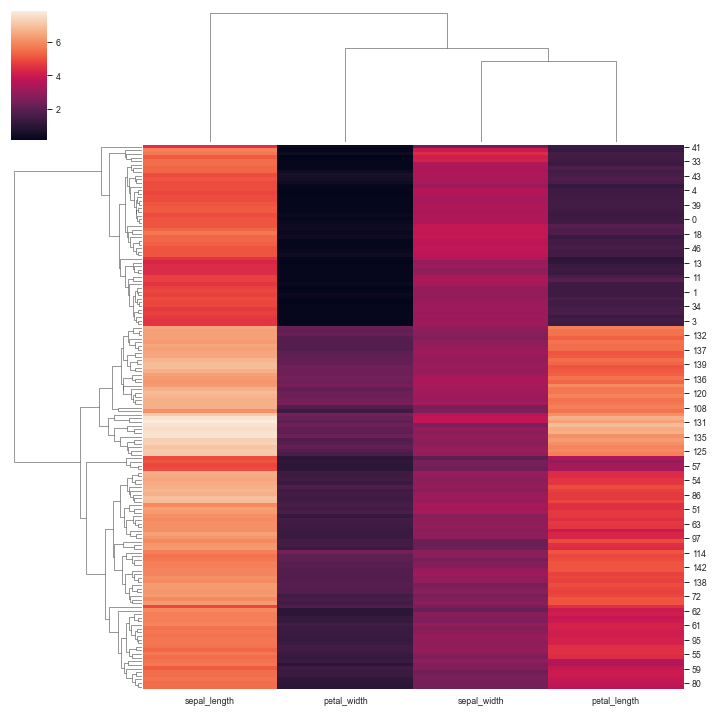

In [221]:
# A Cluster map is a hierarchically clustered heatmap
# The distance between points is calculated, the closest are joined, and this
# continues for the next closest (It compares columns / rows of the heatmap)
# This is data on iris flowers with data on petal lengths


iris = sns.load_dataset('iris')
# iris.head()

species = iris.pop('species')

sns.clustermap(iris)

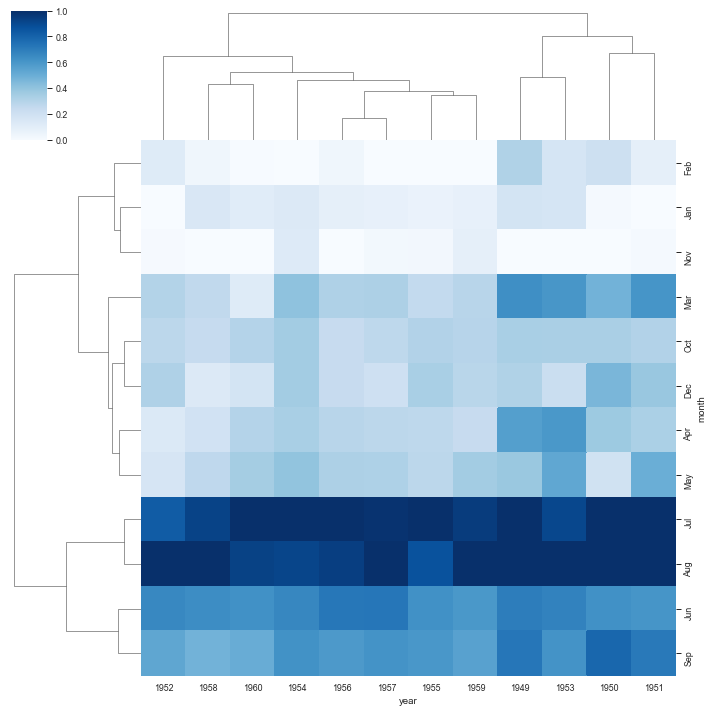

In [222]:
sns.clustermap(flights_pt,cmap='Blues', standard_scale=1)
# With our flights data we can see that years have been reoriented to place
# like data closer together
# You can see clusters of data for July & August for the years 59 & 60
# standard_scale normalizes the data to focus on the clustering

### Regression Plot

In [225]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

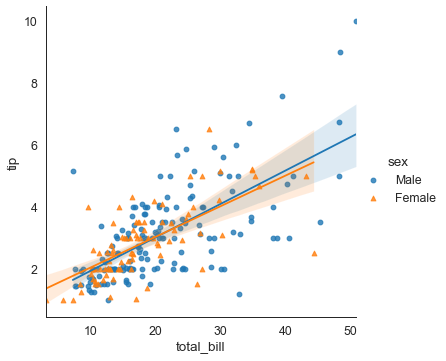

In [226]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

plt.figure(figsize=(8,6))

# We can plot a regression plot studying whether total bill effects the tip
# hue is used to show separation based off of categorical data
# We see that males tend to tip slightly more
# Define different markers for men and women

sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'])

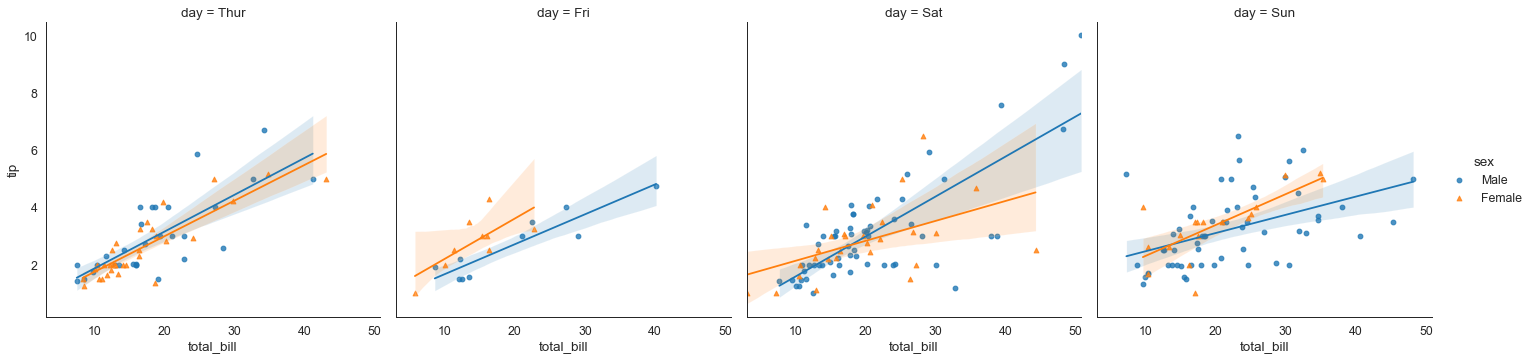

In [228]:
# You can separate the data into separate columns for day data

sns.lmplot(x='total_bill', y='tip', hue='sex',col='day', data=tips_df, markers=['o', '^'])